In [105]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import torch
from torch_geometric.nn import GCNConv, GraphConv, ChebConv
import torch.nn.functional as F 
from src.models.graphconv_residualnet import GraphConvResidualNet
from captum.attr import IntegratedGradients, KernelShap, ShapleyValueSampling

In [177]:
# Load the CSV file
file_path = '/Users/kumarh/Documents/fall_co-op_2023/experiments/syndata_exp_2023-11-15_19-51-04/graphgenexp_correlation_crossentropy_results.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

conv_type  num_layers  dropout       l2  best_model_epoch  train_loss  \
0  GraphConv           2      0.0  0.00001                33    0.082679   
1  GraphConv           2      0.0  0.00010                38    0.090963   
2  GraphConv           2      0.0  0.00100                43    0.113662   
3  GraphConv           2      0.0  0.01000                48    0.186984   
4  GraphConv           2      0.0  0.10000                30    0.315333   

   train_acc  val_loss   val_acc  test_acc  ...  \
0   0.965714  0.118653  0.951875   0.96375  ...   
1   0.966607  0.122540  0.955000   0.96250  ...   
2   0.957857  0.133678  0.947500   0.96375  ...   
3   0.924464  0.194448  0.921875   0.93750  ...   
4   0.870357  0.360139  0.845000   0.86125  ...   

   SHAP_cross_entropy_avg_class_0  SHAP_cross_entropy_avg_class_1  \
0                        0.702830                        1.758694   
1                        0.700392                        1.474904   
2                        0.700900                        0.859168   
3                        0.701070                        0.773197   
4                        0.706460                        0.716346   

   GNNExplainer_cross_entropy_avg_class_0  \
0                                0.878710   
1                                0.878676   
2                                0.878620   
3                                0.860978   
4                                0.878776   

   GNNExplainer_cross_entropy_avg_class_1  IG_auc_avg_class_0  \
0                                0.897319            0.686753   
1                                0.891065            0.589708   
2                                0.882964            0.743278   
3                                0.854246            0.749894   
4                                0.864992            0.815732   

   IG_auc_avg_class_1  SHAP_auc_avg_class_0  SHAP_auc_avg_class_1  \
0            0.770468              0.506719              0.544928   
1            0.690603              0.512120              0.536241   
2            0.880883              0.519371              0.565374   
3            0.924096              0.521905              0.546957   
4            0.862837              0.532702              0.529266   

   GNNExplainer_auc_avg_class_0  GNNExplainer_auc_avg_class_1  
0                      0.489698                      0.495990  
1                      0.499620                      0.564981  
2                      0.499528                      0.522355  
3                      0.521045                      0.503833  
4                      0.498251                      0.500890  

[5 rows x 26 columns]

In [178]:
data.iloc[0, :]

conv_type                                 GraphConv
num_layers                                        2
dropout                                         0.0
l2                                          0.00001
best_model_epoch                                 33
train_loss                                 0.082679
train_acc                                  0.965714
val_loss                                   0.118653
val_acc                                    0.951875
test_acc                                    0.96375
IG_degree_pearson_corr_avg_class_0         0.262367
IG_degree_pearson_corr_avg_class_1         0.311271
IG_degree_spearman_corr_avg_class_0        0.246624
IG_degree_spearman_corr_avg_class_1        0.284359
IG_cross_entropy_avg_class_0               0.711783
IG_cross_entropy_avg_class_1               1.548134
SHAP_cross_entropy_avg_class_0              0.70283
SHAP_cross_entropy_avg_class_1             1.758694
GNNExplainer_cross_entropy_avg_class_0      0.87871
GNNExplainer

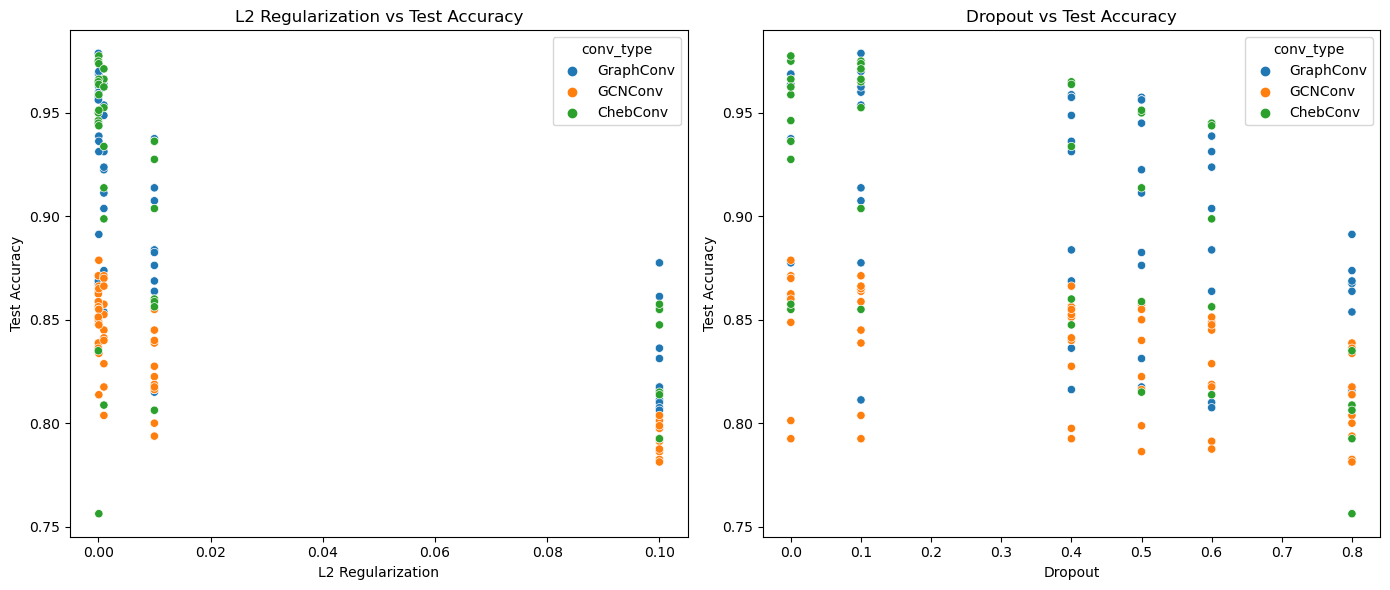

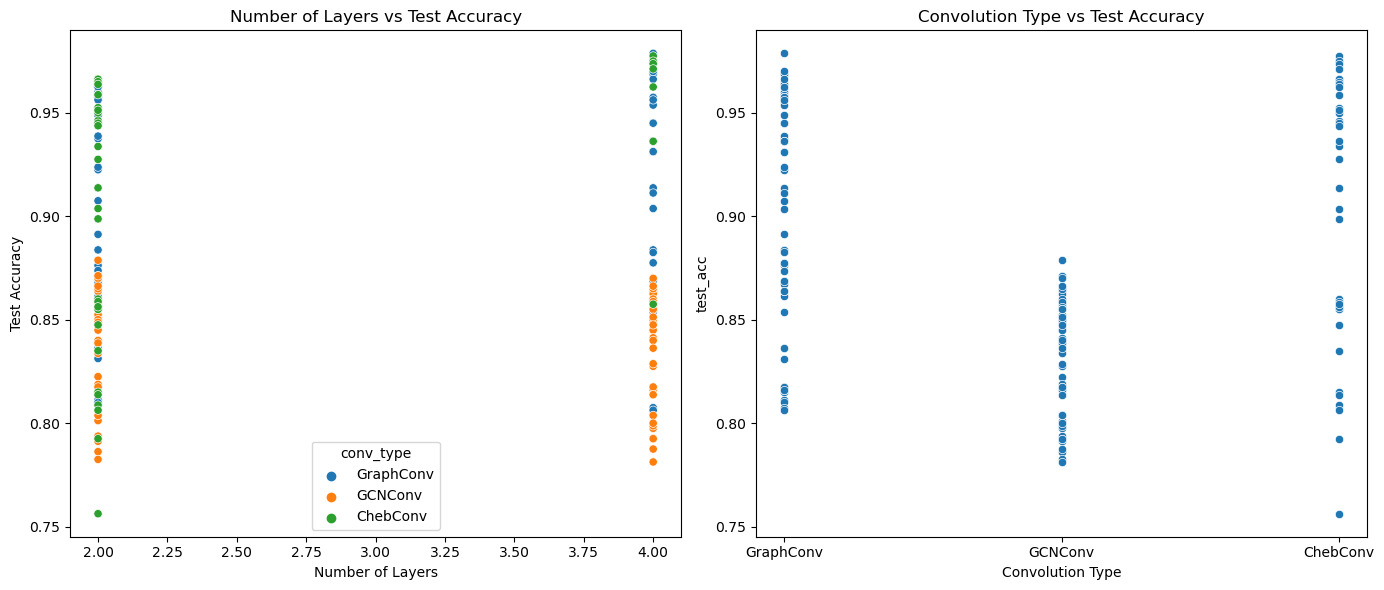

In [41]:
# Creating scatter plots for l2 and dropout vs test_acc
plt.figure(figsize=(14, 6))

# l2 vs Test Accuracy
plt.subplot(1, 2, 1)
sns.scatterplot(x='l2', y='test_acc', hue='conv_type', data=data)
plt.title('L2 Regularization vs Test Accuracy')
plt.xlabel('L2 Regularization')
plt.ylabel('Test Accuracy')

# Dropout vs Test Accuracy
plt.subplot(1, 2, 2)
sns.scatterplot(x='dropout', y='test_acc', hue='conv_type', data=data)
plt.title('Dropout vs Test Accuracy')
plt.xlabel('Dropout')
plt.ylabel('Test Accuracy')

plt.tight_layout()
plt.show()

# Creating scatter plots for l2 and dropout vs num_layers
plt.figure(figsize=(14, 6))

# Number of Layers vs Test Accuracy
plt.subplot(1, 2, 1)
sns.scatterplot(x='num_layers', y='test_acc', hue='conv_type', data=data)
plt.title('Number of Layers vs Test Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Test Accuracy')

# Conv type vs Test Accuracy
plt.subplot(1, 2, 2)
sns.scatterplot(x='conv_type', y='test_acc', data=data)
plt.title('Convolution Type vs Test Accuracy')
plt.xlabel('Convolution Type')


plt.tight_layout()
plt.show()


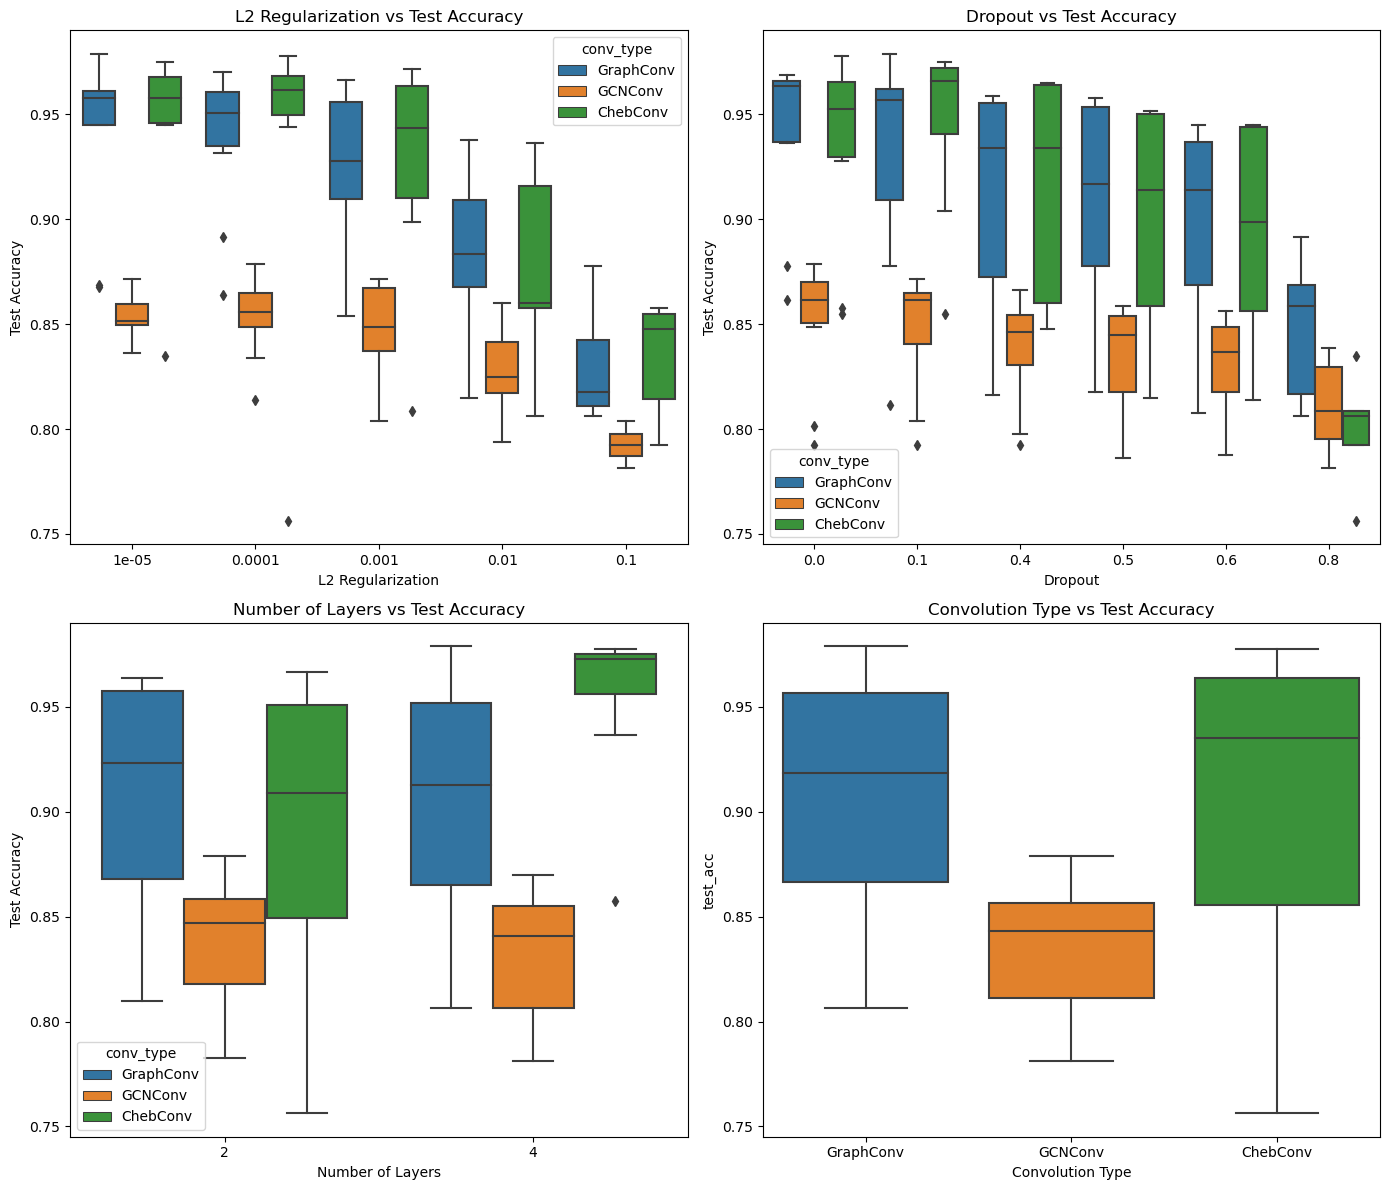

In [49]:
# Creating box plots for l2, dropout, num_layers, and conv_type vs test_acc
plt.figure(figsize=(14, 12))

# L2 Regularization vs Test Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(x='l2', y='test_acc', hue='conv_type', data=data)
plt.title('L2 Regularization vs Test Accuracy')
plt.xlabel('L2 Regularization')
plt.ylabel('Test Accuracy')

# Dropout vs Test Accuracy
plt.subplot(2, 2, 2)
sns.boxplot(x='dropout', y='test_acc', hue='conv_type', data=data)
plt.title('Dropout vs Test Accuracy')
plt.xlabel('Dropout')
plt.ylabel('Test Accuracy')

# Number of Layers vs Test Accuracy
plt.subplot(2, 2, 3)
sns.boxplot(x='num_layers', y='test_acc', hue='conv_type', data=data)
plt.title('Number of Layers vs Test Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Test Accuracy')

# Convolution Type vs Test Accuracy
plt.subplot(2, 2, 4)
sns.boxplot(x='conv_type', y='test_acc', data=data)
plt.title('Convolution Type vs Test Accuracy')
plt.xlabel('Convolution Type')

plt.tight_layout()
plt.show()


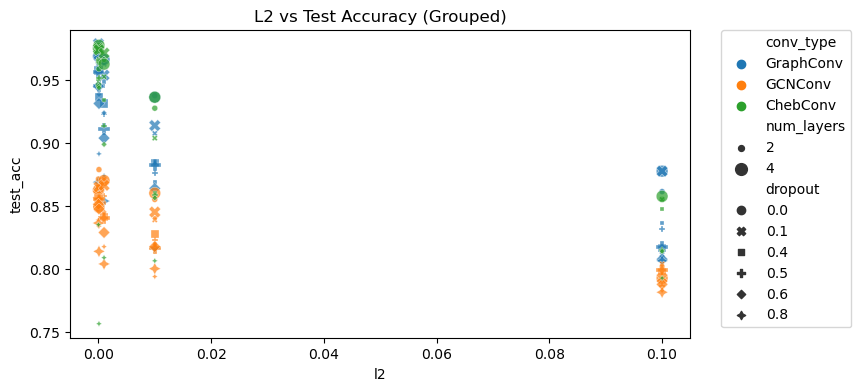

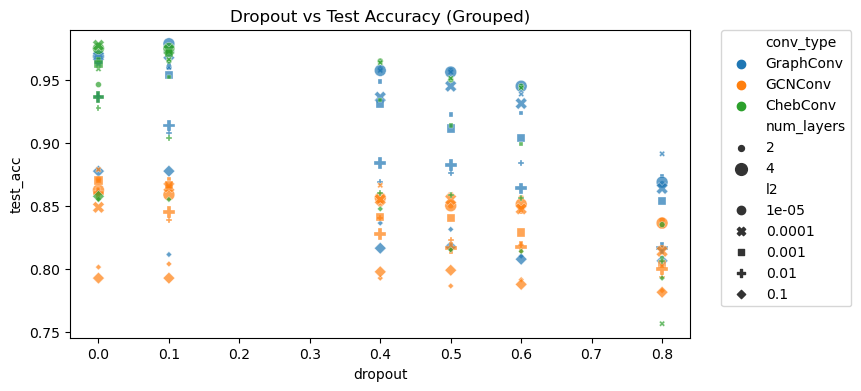

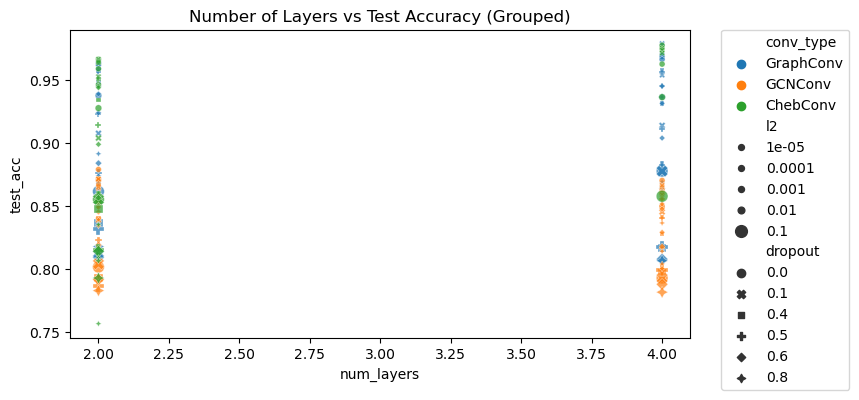

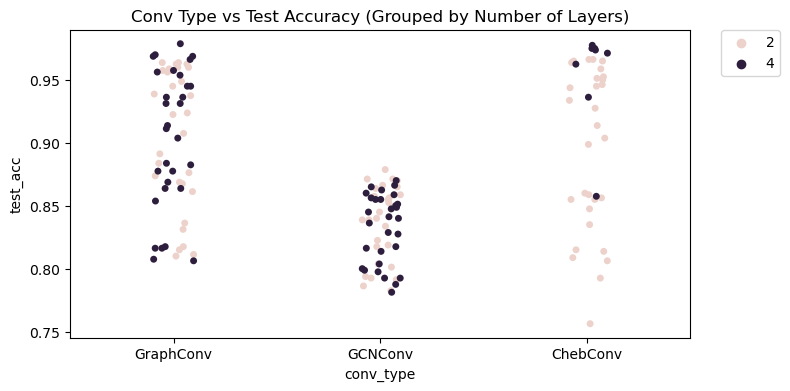

In [24]:
# Function to create scatter plots with grouping
def grouped_scatter(x, y, group_by_cols, data, title):
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=x, y=y, hue=group_by_cols[0], style=group_by_cols[1], size=group_by_cols[2], data=data, alpha=0.7)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 1. l2 vs test_acc grouped by conv_type, dropout, num_layers
grouped_scatter('l2', 'test_acc', ['conv_type', 'dropout', 'num_layers'], data, 'L2 vs Test Accuracy (Grouped)')
# 2. dropout vs test_acc grouped by conv_type, l2, num_layers
grouped_scatter('dropout', 'test_acc', ['conv_type', 'l2', 'num_layers'], data, 'Dropout vs Test Accuracy (Grouped)')
# 3. num_layers vs test_acc grouped by conv_type, dropout, l2
grouped_scatter('num_layers', 'test_acc', ['conv_type', 'dropout', 'l2'], data, 'Number of Layers vs Test Accuracy (Grouped)')
# Since conv_type is a categorical variable, we'll use a categorical scatter plot (stripplot)
def categorical_grouped_scatter(x, y, group_by_cols, data, title):
    plt.figure(figsize=(8, 4))
    sns.stripplot(x=x, y=y, hue=group_by_cols[0], data=data)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 4. conv_type vs test_acc grouped by num_layers, dropout, l2
# Due to the large number of combinations, we'll use only 'num_layers' for grouping in this example
categorical_grouped_scatter('conv_type', 'test_acc', ['num_layers', 'dropout', 'l2'], data, 'Conv Type vs Test Accuracy (Grouped by Number of Layers)')

# Show the plot
plt.show()


In [7]:
# Calculating the average Pearson and Spearman correlation across classes
data['pearson_corr_avg'] = data[['pearson_corr_avg_class_0', 'pearson_corr_avg_class_1']].mean(axis=1)
data['spearman_corr_avg'] = data[['spearman_corr_avg_class_0', 'spearman_corr_avg_class_1']].mean(axis=1)

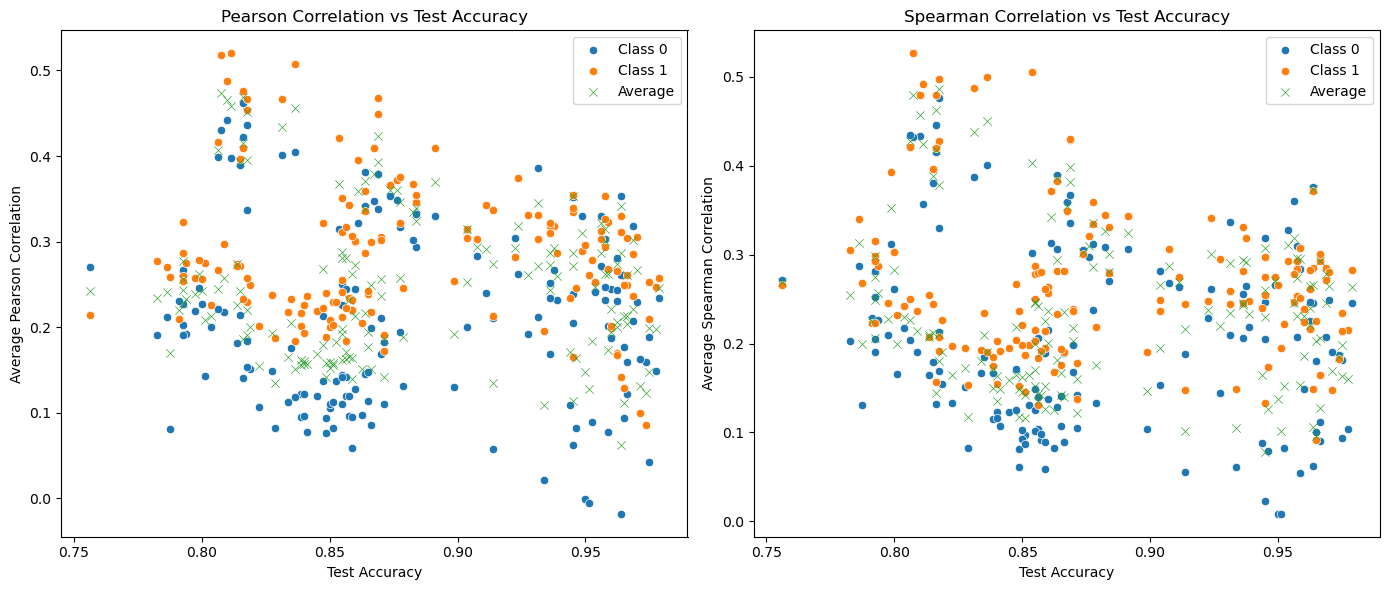

In [11]:
# Creating scatter plots
plt.figure(figsize=(14, 6))

# Pearson correlation vs Test Accuracy
plt.subplot(1, 2, 1)
sns.scatterplot(x='test_acc', y='pearson_corr_avg_class_0', data=data)
sns.scatterplot(x='test_acc', y='pearson_corr_avg_class_1', data=data)
sns.scatterplot(x='test_acc', y='pearson_corr_avg', data=data, marker='x')
plt.title('Pearson Correlation vs Test Accuracy')
plt.xlabel('Test Accuracy')
plt.ylabel('Average Pearson Correlation')
plt.legend(['Class 0', 'Class 1', 'Average'])

# Spearman correlation vs Test Accuracy
plt.subplot(1, 2, 2)
sns.scatterplot(x='test_acc', y='spearman_corr_avg_class_0', data=data)
sns.scatterplot(x='test_acc', y='spearman_corr_avg_class_1', data=data)
sns.scatterplot(x='test_acc', y='spearman_corr_avg', data=data, marker='x')
plt.title('Spearman Correlation vs Test Accuracy')
plt.xlabel('Test Accuracy')
plt.ylabel('Average Spearman Correlation')
plt.legend(['Class 0', 'Class 1', 'Average'])

plt.tight_layout()
plt.show()

In [139]:
# Calculating the average Pearson and Spearman correlation across classes
data['IG_cross_entropy_avg'] = data[['IG_degree_pearson_corr_avg_class_0', 'IG_degree_pearson_corr_avg_class_1']].mean(axis=1)
data['SHAP_cross_entropy_avg'] = data[['IG_degree_spearman_corr_avg_class_0', 'IG_degree_spearman_corr_avg_class_1']].mean(axis=1)
data['GNNExplainer_cross_entropy_avg'] = data[['IG_cross_entropy_avg_class_0', 'IG_cross_entropy_avg_class_1']].mean(axis=1)

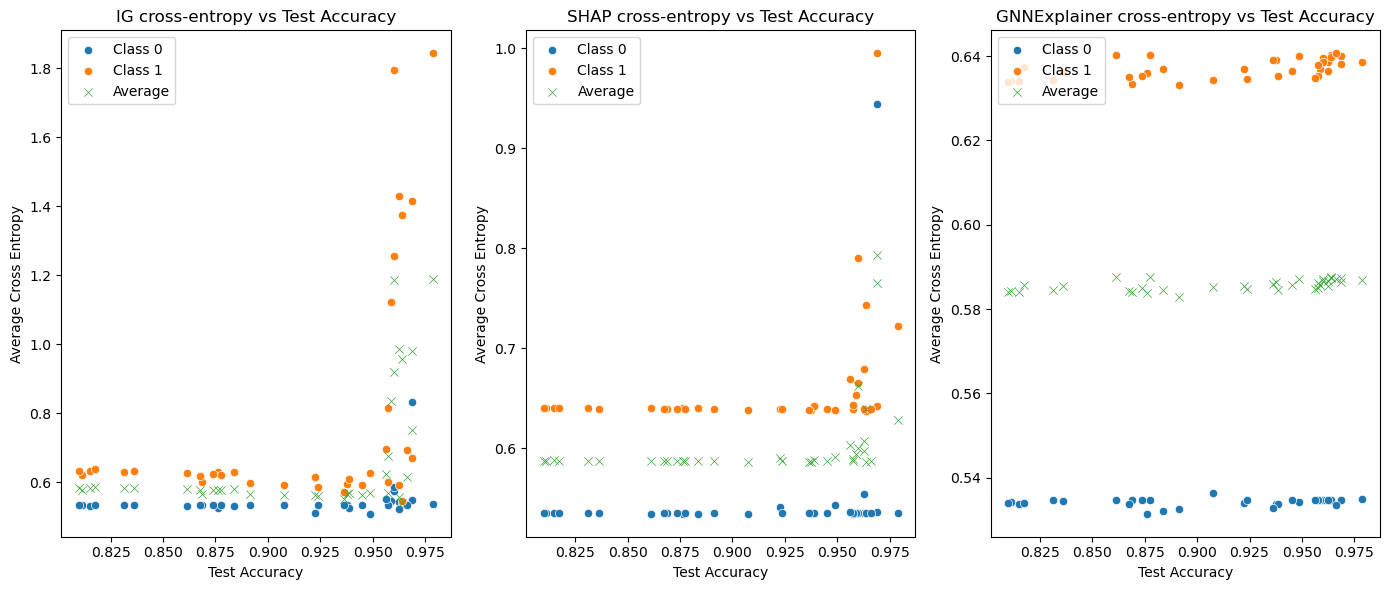

In [140]:
# Creating scatter plots
plt.figure(figsize=(14, 6))

# Cross Entropy vs Test Accuracy
plt.subplot(1, 3, 1)
sns.scatterplot(x='test_acc', y='IG_degree_pearson_corr_avg_class_0', data=data)
sns.scatterplot(x='test_acc', y='IG_degree_pearson_corr_avg_class_1', data=data)
sns.scatterplot(x='test_acc', y='IG_cross_entropy_avg', data=data, marker='x')
plt.title('IG cross-entropy vs Test Accuracy')
plt.xlabel('Test Accuracy')
plt.ylabel('Average Cross Entropy')
plt.legend(['Class 0', 'Class 1', 'Average'])

plt.subplot(1, 3, 2)
sns.scatterplot(x='test_acc', y='IG_degree_spearman_corr_avg_class_0', data=data)
sns.scatterplot(x='test_acc', y='IG_degree_spearman_corr_avg_class_1', data=data)
sns.scatterplot(x='test_acc', y='SHAP_cross_entropy_avg', data=data, marker='x')
plt.title('SHAP cross-entropy vs Test Accuracy')
plt.xlabel('Test Accuracy')
plt.ylabel('Average Cross Entropy')
plt.legend(['Class 0', 'Class 1', 'Average'])

plt.subplot(1, 3, 3)
sns.scatterplot(x='test_acc', y='IG_cross_entropy_avg_class_0', data=data)
sns.scatterplot(x='test_acc', y='IG_cross_entropy_avg_class_1', data=data)
sns.scatterplot(x='test_acc', y='GNNExplainer_cross_entropy_avg', data=data, marker='x')
plt.title('GNNExplainer cross-entropy vs Test Accuracy')
plt.xlabel('Test Accuracy')
plt.ylabel('Average Cross Entropy')
plt.legend(['Class 0', 'Class 1', 'Average'])

plt.tight_layout()
plt.show()

In [8]:
saved_dir = '/Users/kumarh/Documents/fall_co-op_2023/experiments/syndata_exp_2023-11-15_19-51-04/'
train_dataset = torch.load(f'{saved_dir}/train_dataset.pt')
val_dataset = torch.load(f'{saved_dir}/val_dataset.pt')
test_dataset = torch.load(f'{saved_dir}/test_dataset.pt')
num_features = 10
num_classes = 2

In [9]:
# compare side-by-side attributions of IG and KernelSHAP for a few best and worst performing models
test_acc_sorted = data.sort_values(by='test_acc', ascending=False)
best_models = test_acc_sorted.head(2)
worst_models = test_acc_sorted.tail(2)
# merge into one dataframe
best_worst_models = pd.concat([best_models, worst_models])
best_worst_models

conv_type  num_layers  dropout       l2  best_model_epoch  train_loss  \
35   GraphConv           4      0.1  0.00001                44    0.085028   
151   ChebConv           4      0.0  0.00010                35    0.049079   
119    GCNConv           4      0.8  0.10000                50    0.620898   
146   ChebConv           2      0.8  0.00010                 4    0.693476   

     train_acc  val_loss   val_acc  test_acc  pearson_corr_avg_class_0  \
35    0.966786  0.113369  0.960625   0.97875                  0.234107   
151   0.981429  0.210858  0.931875   0.97750                  0.149059   
119   0.689286  0.562186  0.798125   0.78125                       NaN   
146   0.484643  0.693101  0.508750   0.75625                  0.270902   

     pearson_corr_avg_class_1  spearman_corr_avg_class_0  \
35                   0.257639                   0.245101   
151                  0.246926                   0.104373   
119                       NaN                        NaN   
146                  0.214335                   0.271972   

     spearman_corr_avg_class_1  pearson_corr_avg  spearman_corr_avg  
35                    0.282161          0.245873           0.263631  
151                   0.215126          0.197993           0.159749  
119                        NaN               NaN                NaN  
146                   0.266332          0.242619           0.269152

In [10]:
# compare attributions of IG and KernelSHAP for a few most and least correlated models
corr_sorted = data.sort_values(by='pearson_corr_avg', ascending=False)
# remove models having NaN correlation
corr_sorted = corr_sorted[~corr_sorted['pearson_corr_avg'].isna()]
most_correlated_models = corr_sorted.head(2)
least_correlated_models = corr_sorted.tail(2)
most_least_corr_models = pd.concat([most_correlated_models, least_correlated_models])
most_least_corr_models

conv_type  num_layers  dropout      l2  best_model_epoch  train_loss  \
54   GraphConv           4      0.6  0.1000                 3    0.503134   
44   GraphConv           4      0.4  0.1000                43    0.439382   
132   ChebConv           2      0.4  0.0010                40    0.305299   
131   ChebConv           2      0.4  0.0001                48    0.203074   

     train_acc  val_loss  val_acc  test_acc  pearson_corr_avg_class_0  \
54    0.783214  0.941424  0.69625   0.80750                  0.430049   
44    0.808036  0.388158  0.82750   0.81625                  0.461793   
132   0.876250  0.224348  0.91500   0.93375                  0.022130   
131   0.918750  0.122271  0.95250   0.96375                 -0.017805   

     pearson_corr_avg_class_1  spearman_corr_avg_class_0  \
54                   0.517563                   0.431956   
44                   0.475744                   0.445715   
132                  0.195103                   0.060858   
131                  0.141894                   0.062487   

     spearman_corr_avg_class_1  pearson_corr_avg  spearman_corr_avg  
54                    0.526218          0.473806           0.479087  
44                    0.479568          0.468768           0.462641  
132                   0.149005          0.108616           0.104932  
131                   0.149223          0.062044           0.105855

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [100]:
def visualize_graph(graph, ax, title='Original Graph'):
    G = nx.Graph()

    # Create nodes for each data point in the graph
    for i in range(graph.num_nodes):
        G.add_node(i)

    # Create edges
    edges = graph.edge_index.t().tolist()
    G.add_edges_from(edges)

    # Define layout and node positions
    pos = nx.spring_layout(G, seed=42)

    # get list of max index of node feature
    graph_x = graph.x.cpu().detach().numpy()
    node_labels = {i:graph_x[i].argmax() for i in range(len(graph_x))}
    # there is only one motif in the list for this binary classification problem
    node_colors = ['lightcoral' if node in graph.motifs[0] else 'skyblue' for node in G.nodes]

    # Draw the original graph
    nx.draw_networkx(G, pos, node_color=node_colors, ax=ax)

    ax.set_title(title)

    return pos


def visualize_attributions(graph, node_attr_list, ax, title='Node attributions', pos=None):
    G = nx.Graph()
    
    # Create nodes for each data point in the graph
    for i in range(graph.num_nodes):
        G.add_node(i)
    
    # Create edges without considering attributions, since we focus on node attributions here
    for edge_index in range(graph.num_edges):
        source, target = graph.edge_index[:, edge_index].tolist()
        G.add_edge(source, target)
    
    # Define layout and node positions
    if pos is None:
        pos = nx.spring_layout(G, seed=42)
    
    # Determine node sizes based on their attribution weights
    # The largest node will have a size of `max_size`
    # and subsequent nodes will be scaled down based on their rank
    node_sizes = (node_attr_list - np.min(node_attr_list)) / (np.max(node_attr_list) - np.min(node_attr_list))
    max_size = 1000
    node_sizes = max_size * node_sizes
    # handle if entry in node_sizes is 0
    node_sizes = [size if size > 0 else 1 for size in node_sizes]
    
    # Draw the nodes with a colormap
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes, cmap=plt.get_cmap('Reds'), ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, alpha=0.5, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)
    
    # Set the color bar to indicate the attribution weights
    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('Reds'), norm=plt.Normalize(vmin=min(node_sizes), vmax=max(node_sizes)))
    sm.set_array([])
    plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5, label='Node Attribution')
    
    ax.set_title(title)
    ax.axis('off')  # Hide the axis

In [15]:
def model_forward(mask, data):
    """
    Helper function to perform forward pass of model with masked input
    """
    x = data.x
    y_list = []
    for m in mask:
        x_masked = x*m
        y = model(x_masked, data.edge_index, data.batch)[0]
        y_list.append(y)
    return torch.stack(y_list).squeeze()

def kernelSHAP_model_forward(mask, data):
    """
    Helper function to perform forward pass of model with masked input
    """
    x = data.x
    y_list = []
    for m in mask:
        x_masked = x*m
        y = model(x_masked, data.edge_index, data.batch)[0]
        y_list.append(y)
    return torch.stack(y_list)

In [96]:
def calculate_attributions(model, input_data, mask, class_label):
    """
    Helper function to calculate IG, KernelSHAP, and GNNExplainer attributions.
    Returns node attributions for each method.
    """

    # calculate IG attributions
    ig = IntegratedGradients(model_forward)
    ig_attr = ig.attribute(mask, target=class_label, additional_forward_args=(input_data,), n_steps=100)[0]

    # calcualte KernelSHAP attributions
    shapley_value = KernelShap(kernelSHAP_model_forward)
    shap_attr = shapley_value.attribute(mask, target=class_label, additional_forward_args=(input_data,))[0]

    # calculate max absolute attribution across all features for each node
    ig_node_attr = torch.sum(torch.abs(ig_attr), axis=1).detach().cpu().numpy()
    shap_node_attr = torch.sum(torch.abs(shap_attr), axis=1).detach().cpu().numpy()

    # Create an instance of GNNExplainer, passing the model
    gnnExplainer = Explainer(
        model=model,
        algorithm=GNNExplainer(epochs=200, lr=1e-3),
        explanation_type='phenomenon',
        node_mask_type='object',
        edge_mask_type='object',
        model_config=dict(
            mode='multiclass_classification',
            task_level='graph',
            return_type='log_probs',
        ),
    )

    node_index = 0
    gnn_explanation = gnnExplainer(x=input_data.x, 
                            edge_index=input_data.edge_index, 
                            batch=input_data.batch, 
                            target=torch.tensor(class_label, dtype=torch.long).unsqueeze(0),
                            index=None)

    # gnnexplainer_node_attr = gnn_explanation.node_mask.detach().cpu().numpy()
    gnnexplainer_node_attr = torch.sum(torch.abs(gnn_explanation.node_mask), axis=1).detach().cpu().numpy()

    return ig_node_attr, shap_node_attr, gnnexplainer_node_attr

tensor(1)
Predicted class: 1
tensor(1)
Predicted class: 1
tensor(1)
Predicted class: 1


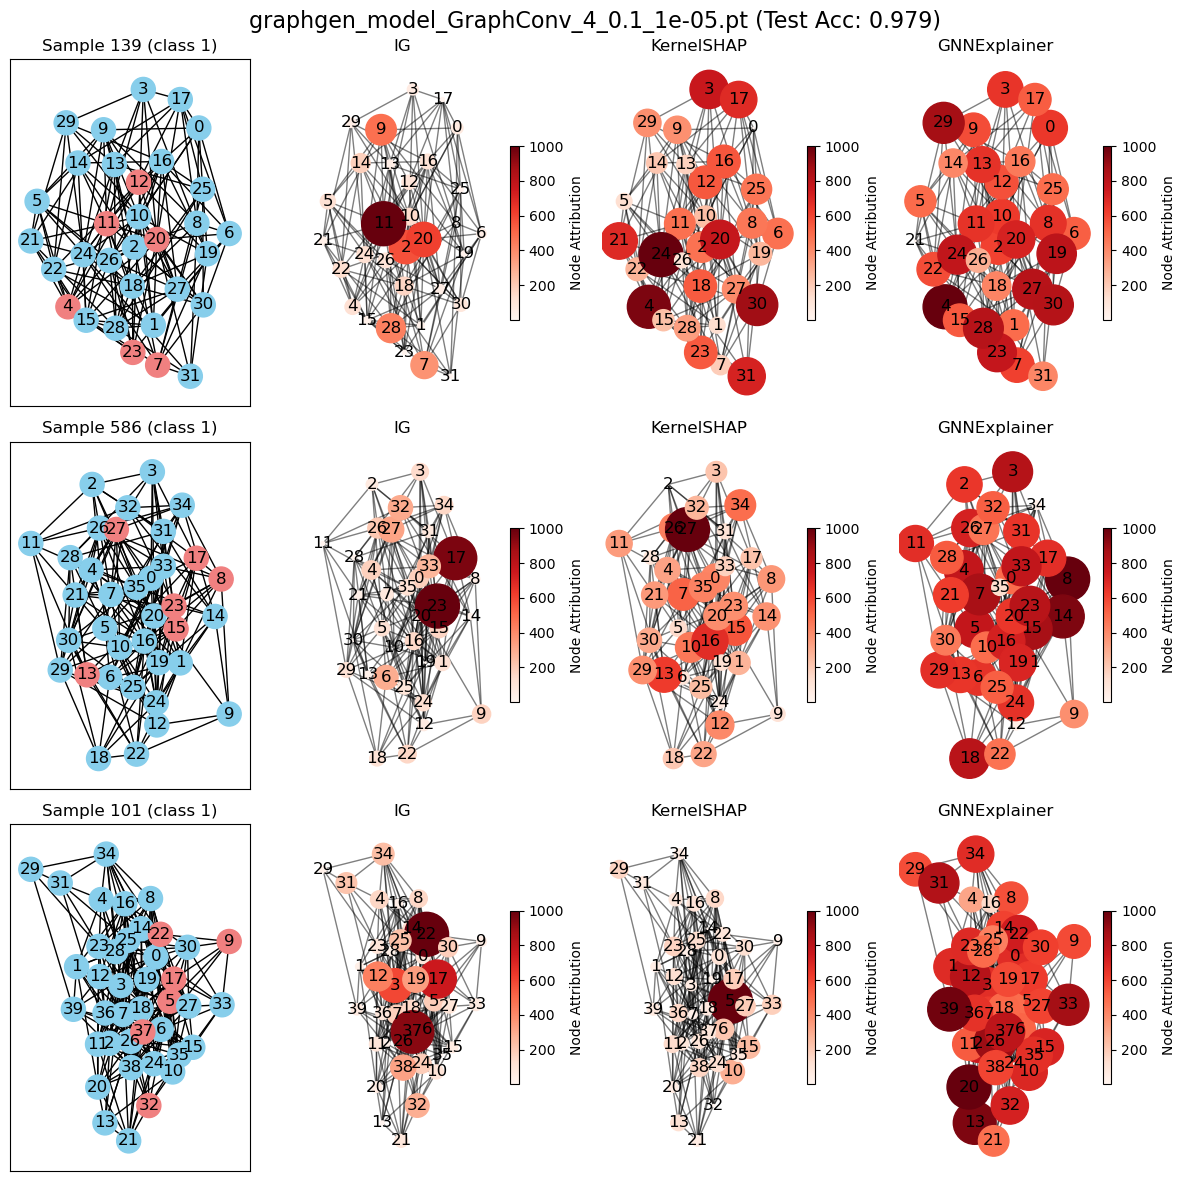

tensor(1)
Predicted class: 1
tensor(1)
Predicted class: 1
tensor(1)
Predicted class: 1


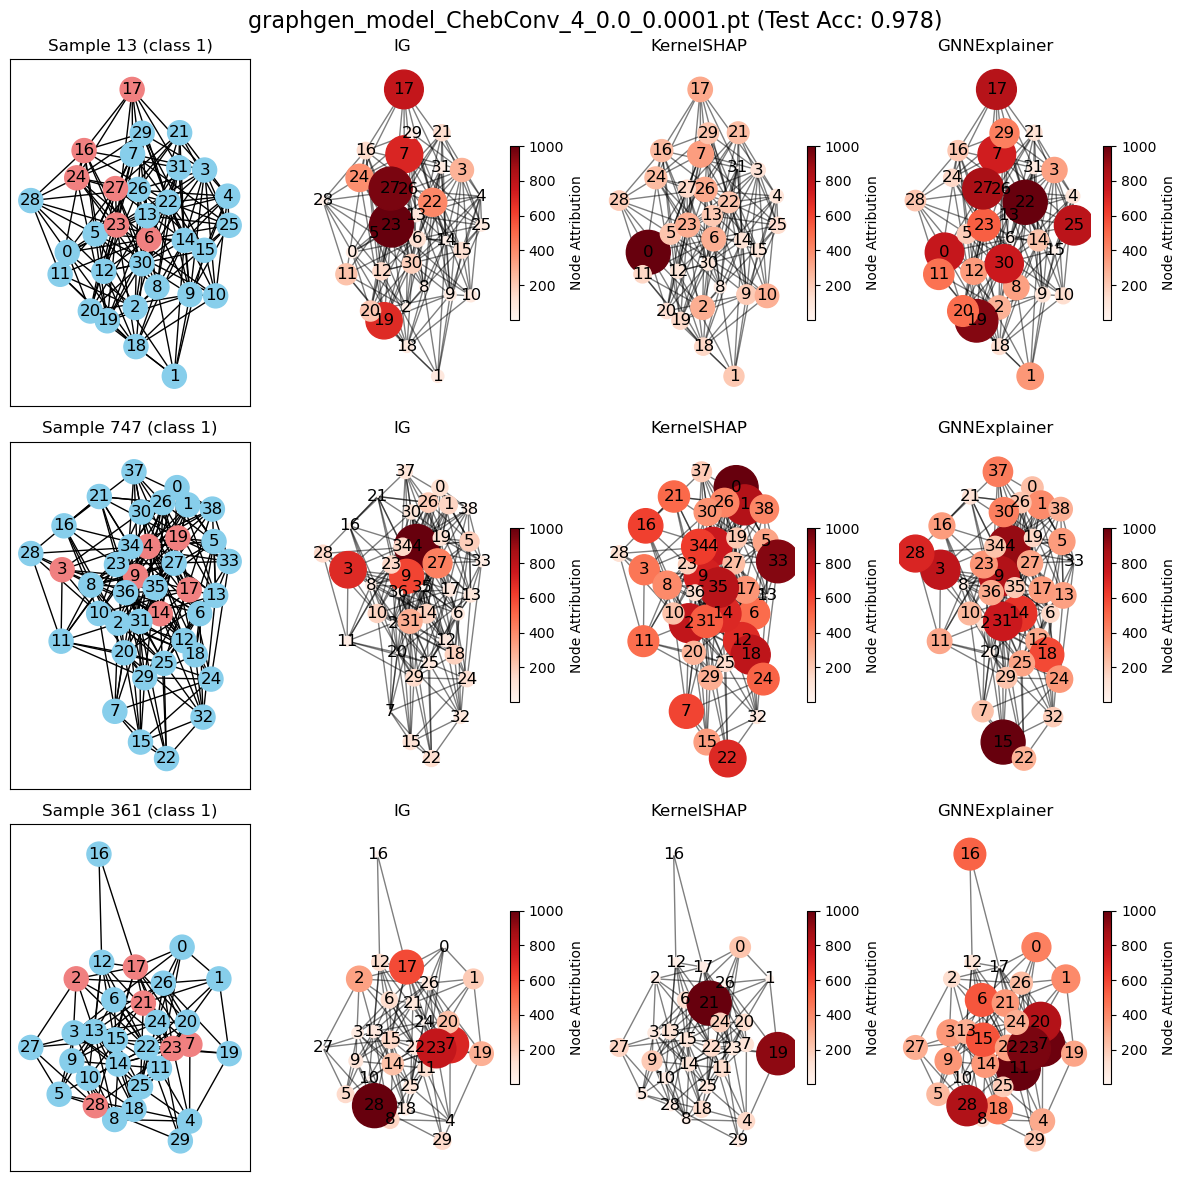

tensor(1)
Predicted class: 1


/var/folders/27/zfxsglqs1dz7r2s38wpgb8b88zxvq5/T/ipykernel_42004/3882869317.py:48: RuntimeWarning: invalid value encountered in divide
  node_sizes = (node_attr_list - np.min(node_attr_list)) / (np.max(node_attr_list) - np.min(node_attr_list))


tensor(1)
Predicted class: 1


/var/folders/27/zfxsglqs1dz7r2s38wpgb8b88zxvq5/T/ipykernel_42004/3882869317.py:48: RuntimeWarning: invalid value encountered in divide
  node_sizes = (node_attr_list - np.min(node_attr_list)) / (np.max(node_attr_list) - np.min(node_attr_list))


tensor(1)
Predicted class: 1


/var/folders/27/zfxsglqs1dz7r2s38wpgb8b88zxvq5/T/ipykernel_42004/3882869317.py:48: RuntimeWarning: invalid value encountered in divide
  node_sizes = (node_attr_list - np.min(node_attr_list)) / (np.max(node_attr_list) - np.min(node_attr_list))


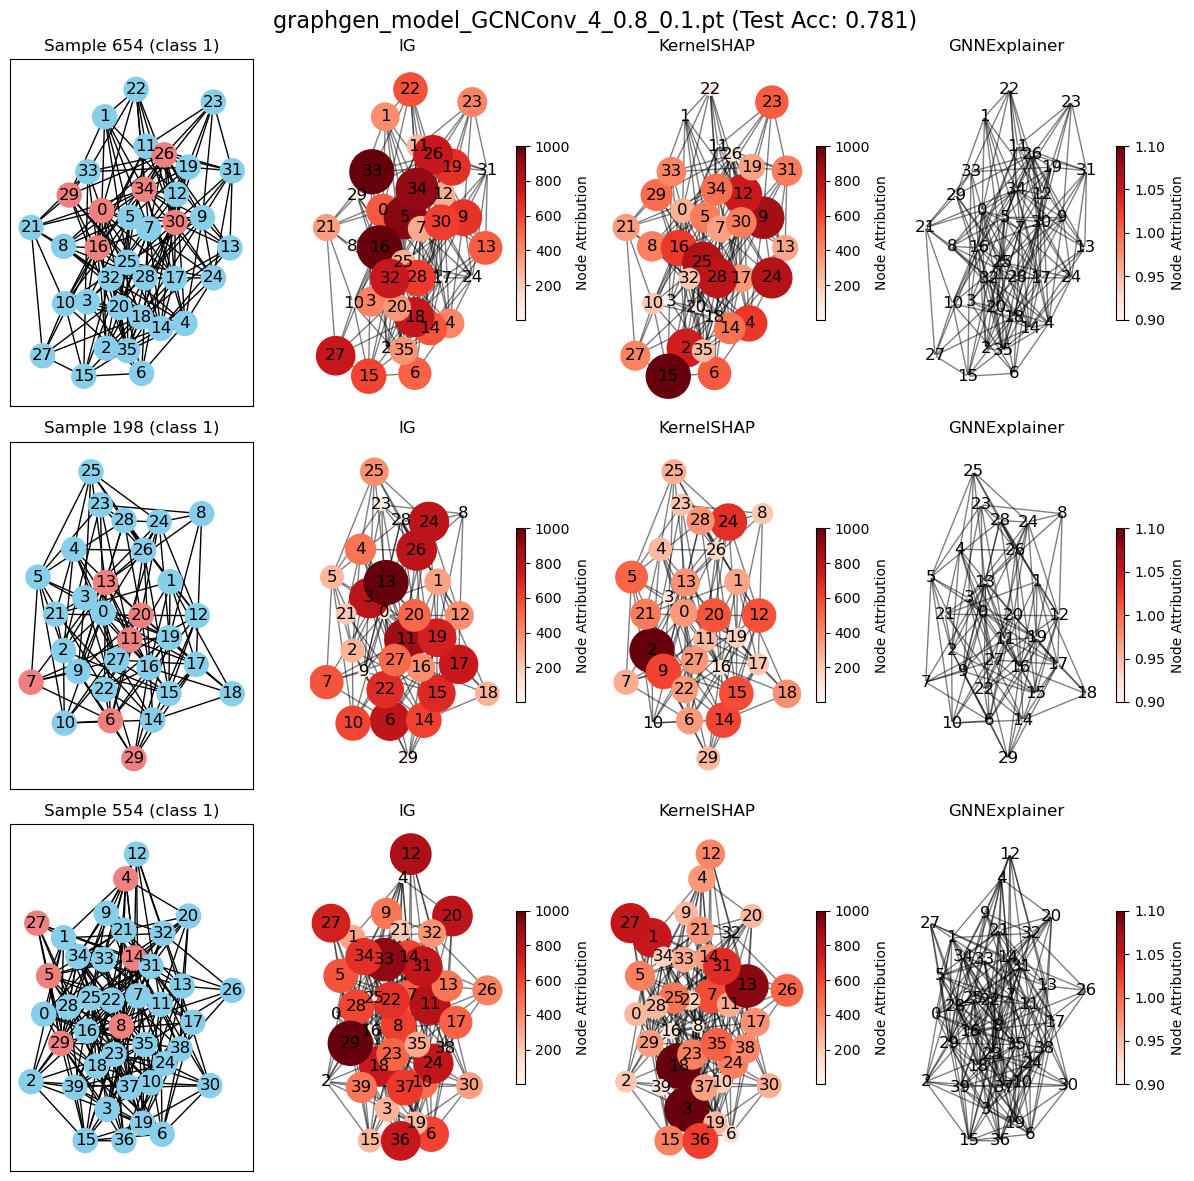

tensor(0)
Predicted class: 0
tensor(1)
Predicted class: 1
tensor(1)
Predicted class: 1


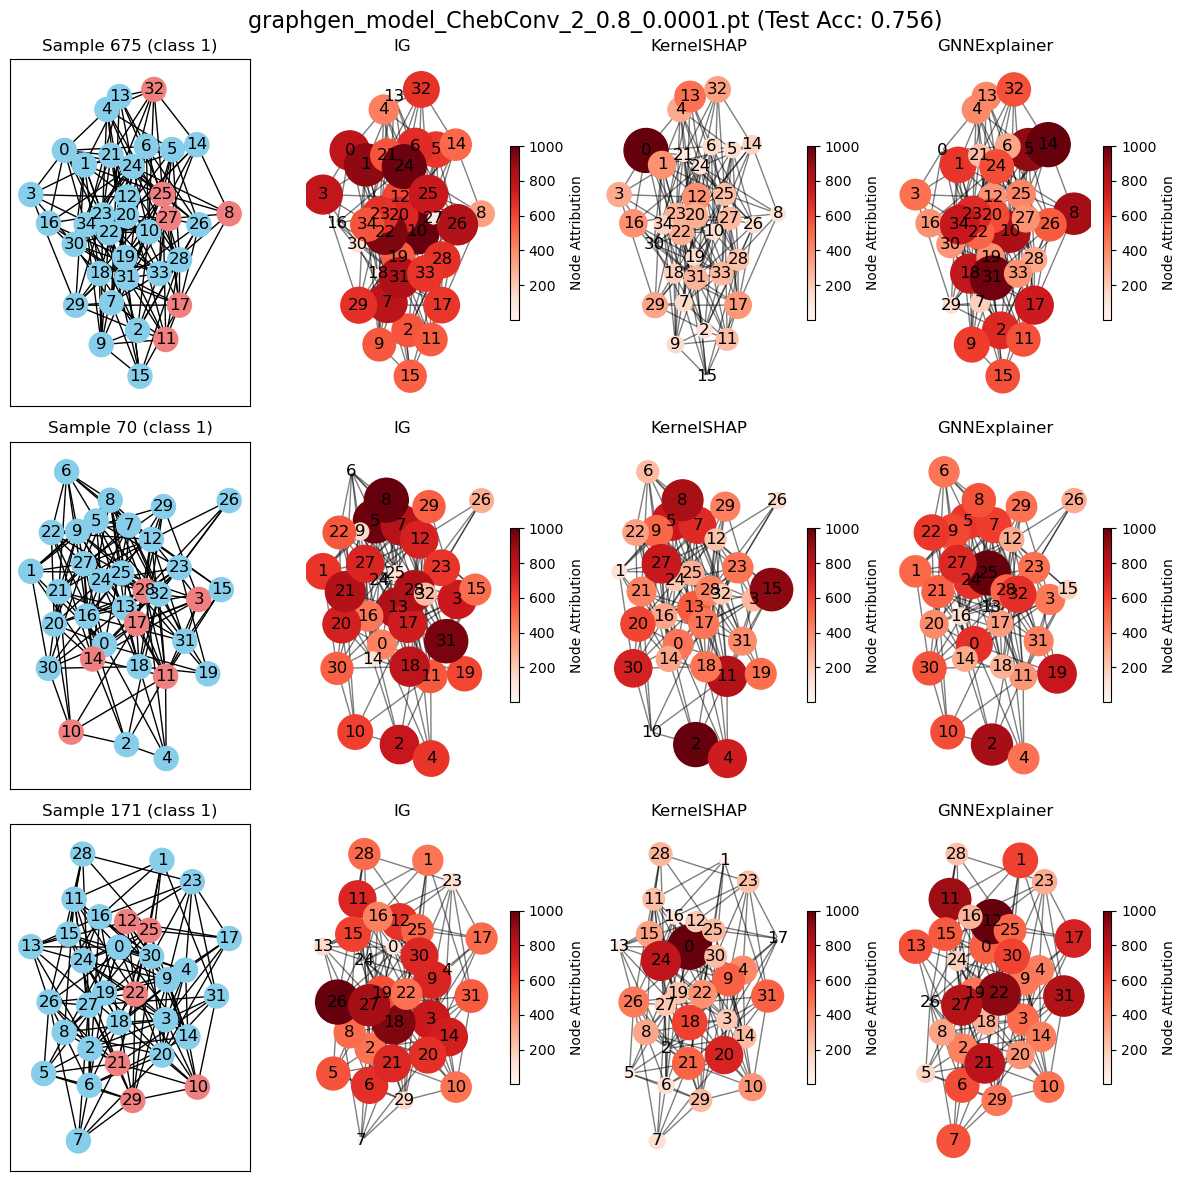

In [176]:
# print model names
for i in range(len(best_worst_models)):
    conv_types = {'GraphConv': GraphConv, 'GCNConv': GCNConv, 'ChebConv': ChebConv}
    model = GraphConvResidualNet(dim=32,
                                num_features=num_features,
                                num_classes=num_classes,
                                num_layers=best_worst_models.iloc[i]['num_layers'],
                                conv_type=conv_types[best_worst_models.iloc[i]['conv_type']],
                                dropout=best_worst_models.iloc[i]['dropout']).to(device)
    model_name = f"graphgen_model_{best_worst_models.iloc[i]['conv_type']}_{best_worst_models.iloc[i]['num_layers']}_{best_worst_models.iloc[i]['dropout']}_{best_worst_models.iloc[i]['l2']}.pt"
    model_path = f'syndata_exp_2023-11-15_19-51-04/{model_name}'
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()


    fig, ax = plt.subplots(3, 4, figsize=(12, 12))
    plt.suptitle(f'{model_name} (Test Acc: {best_worst_models.iloc[i]["test_acc"]:.3f})', fontsize=16)

    count = 0
    while count < 3:
        # pick random sample from test set
        sample_i = np.random.randint(len(test_dataset))
        input_data = test_dataset[sample_i]

        class_label = 1
        if input_data.y.item() != class_label:
            continue

        out = model(input_data.x, input_data.edge_index, input_data.batch)[0]
        pred = out.argmax()
        print(f'Predicted class: {pred.item()}')
        input_data = input_data.to(device)
        
        mask = torch.stack([torch.ones_like(input_data.x).requires_grad_(True).to(device)]*1)

        # calculate attributions
        ig_node_attr, shap_node_attr, gnnexplainer_node_attr = calculate_attributions(model, input_data, mask, class_label)
    
        # Visualize attributions for the example data
        visualize_graph(input_data, ax[count][0], f'Sample {sample_i} (class {input_data.y.item()})')
        visualize_attributions(input_data, ig_node_attr, ax[count][1], 'IG')
        visualize_attributions(input_data, shap_node_attr, ax[count][2], 'KernelSHAP')
        visualize_attributions(input_data, gnnexplainer_node_attr, ax[count][3], 'GNNExplainer')
        
        count += 1

    plt.tight_layout()
    plt.show()

In [173]:
test_dataset

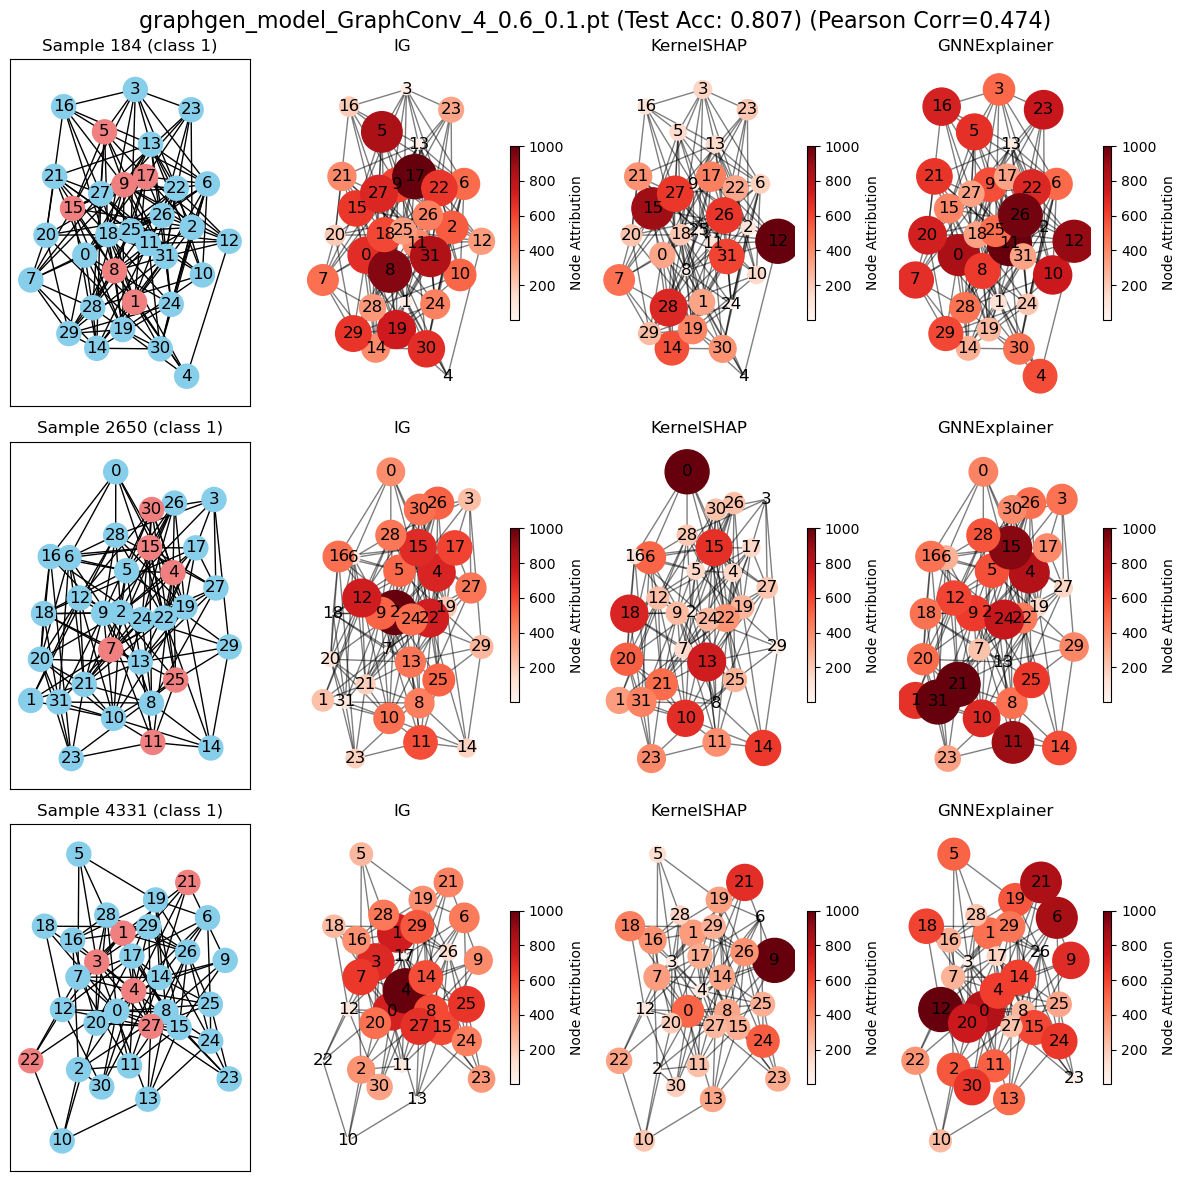

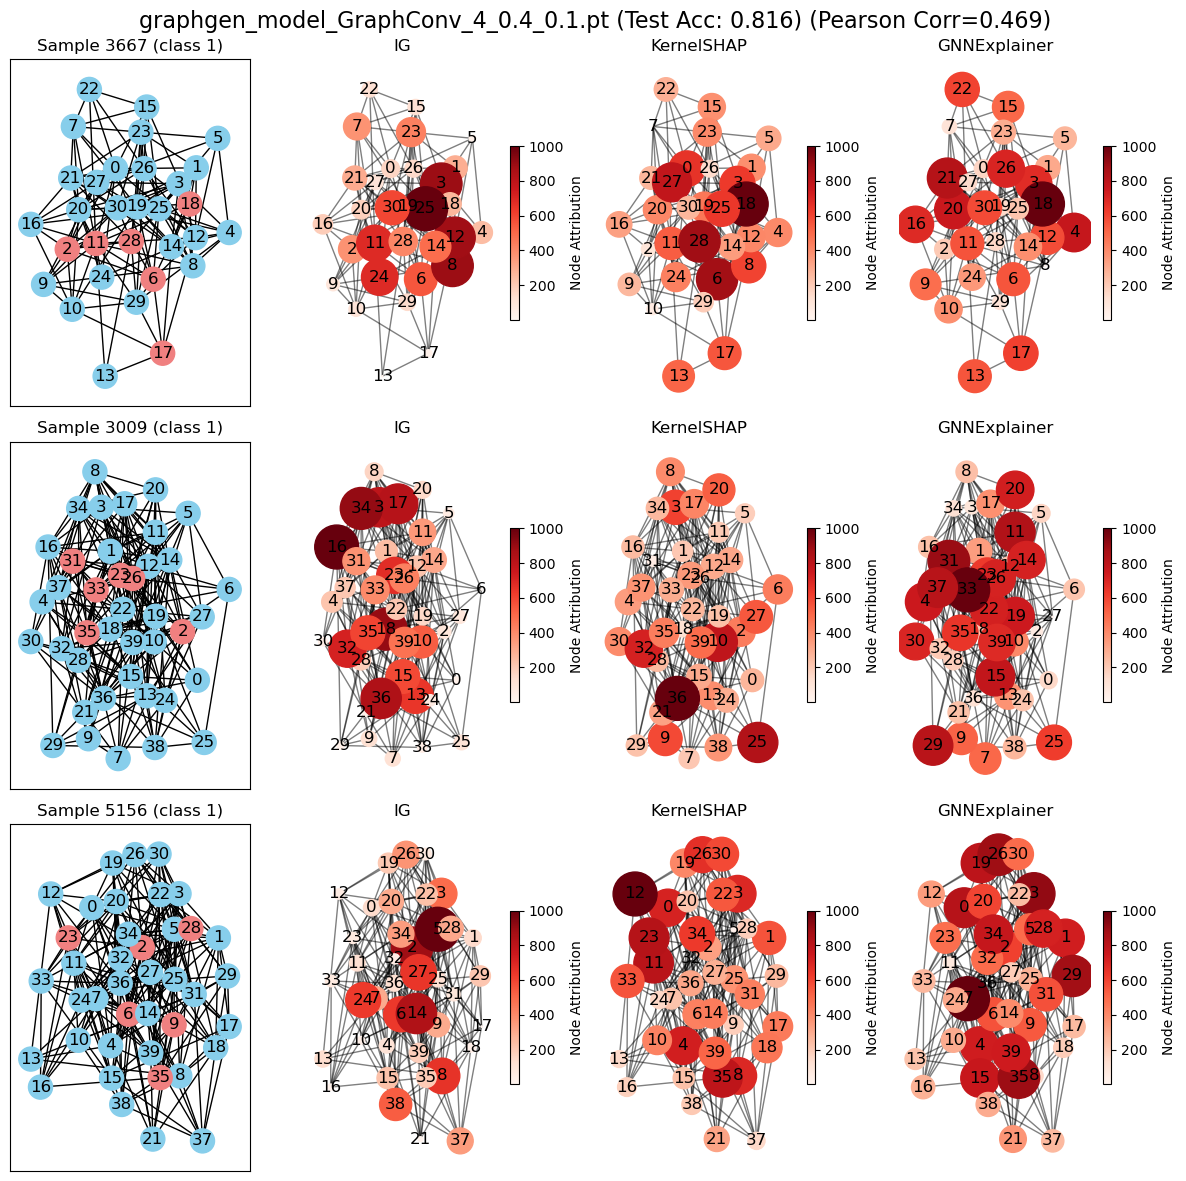

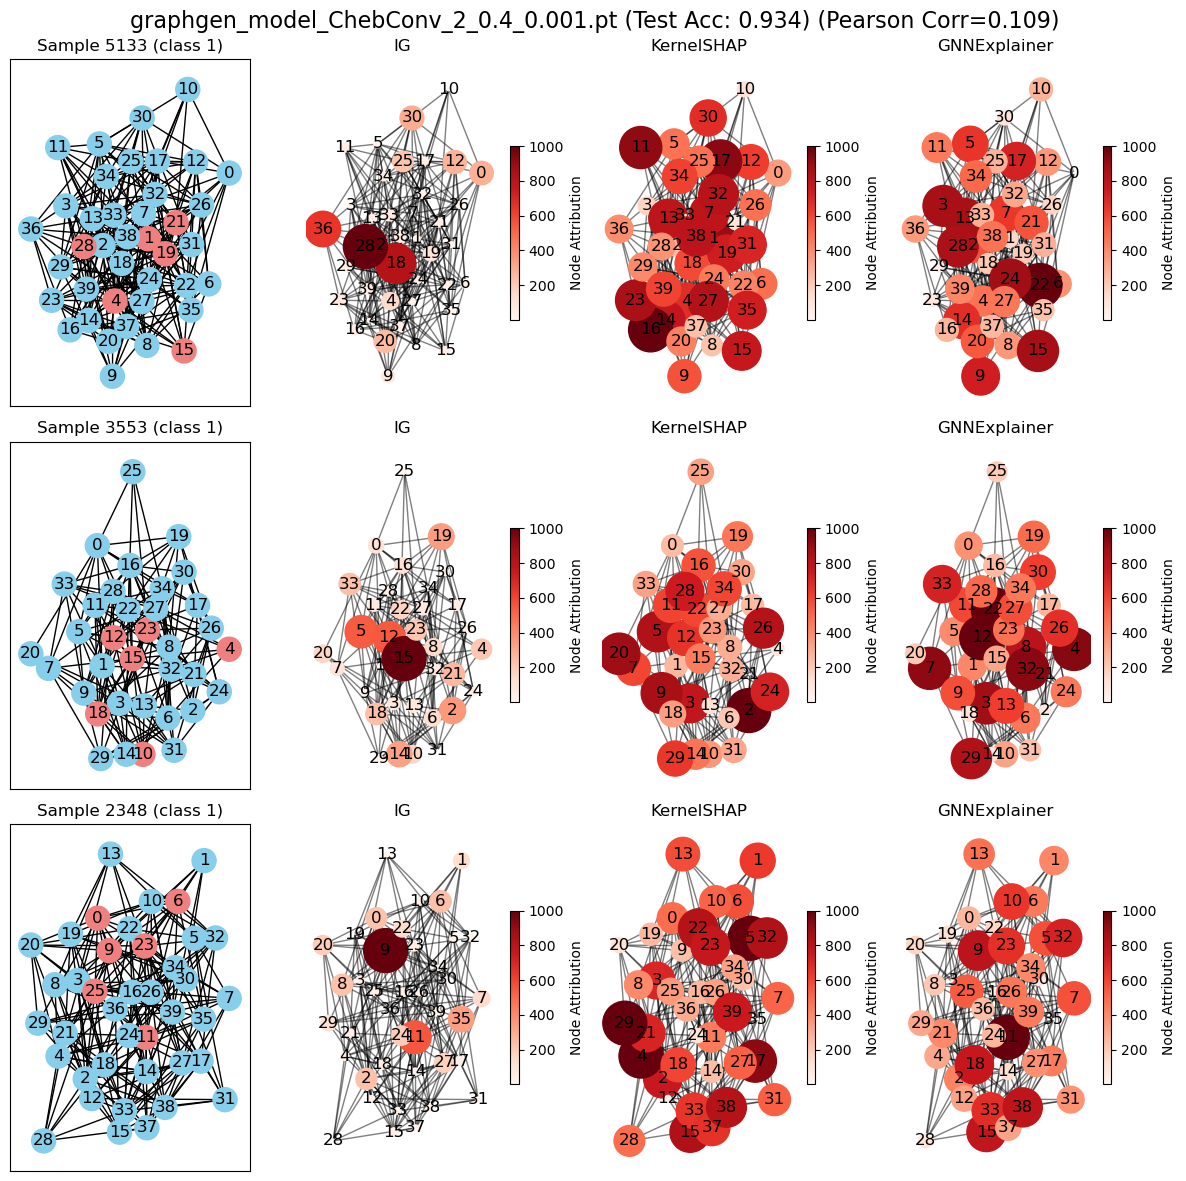

/var/folders/27/zfxsglqs1dz7r2s38wpgb8b88zxvq5/T/ipykernel_42004/3882869317.py:48: RuntimeWarning: invalid value encountered in divide
  node_sizes = (node_attr_list - np.min(node_attr_list)) / (np.max(node_attr_list) - np.min(node_attr_list))


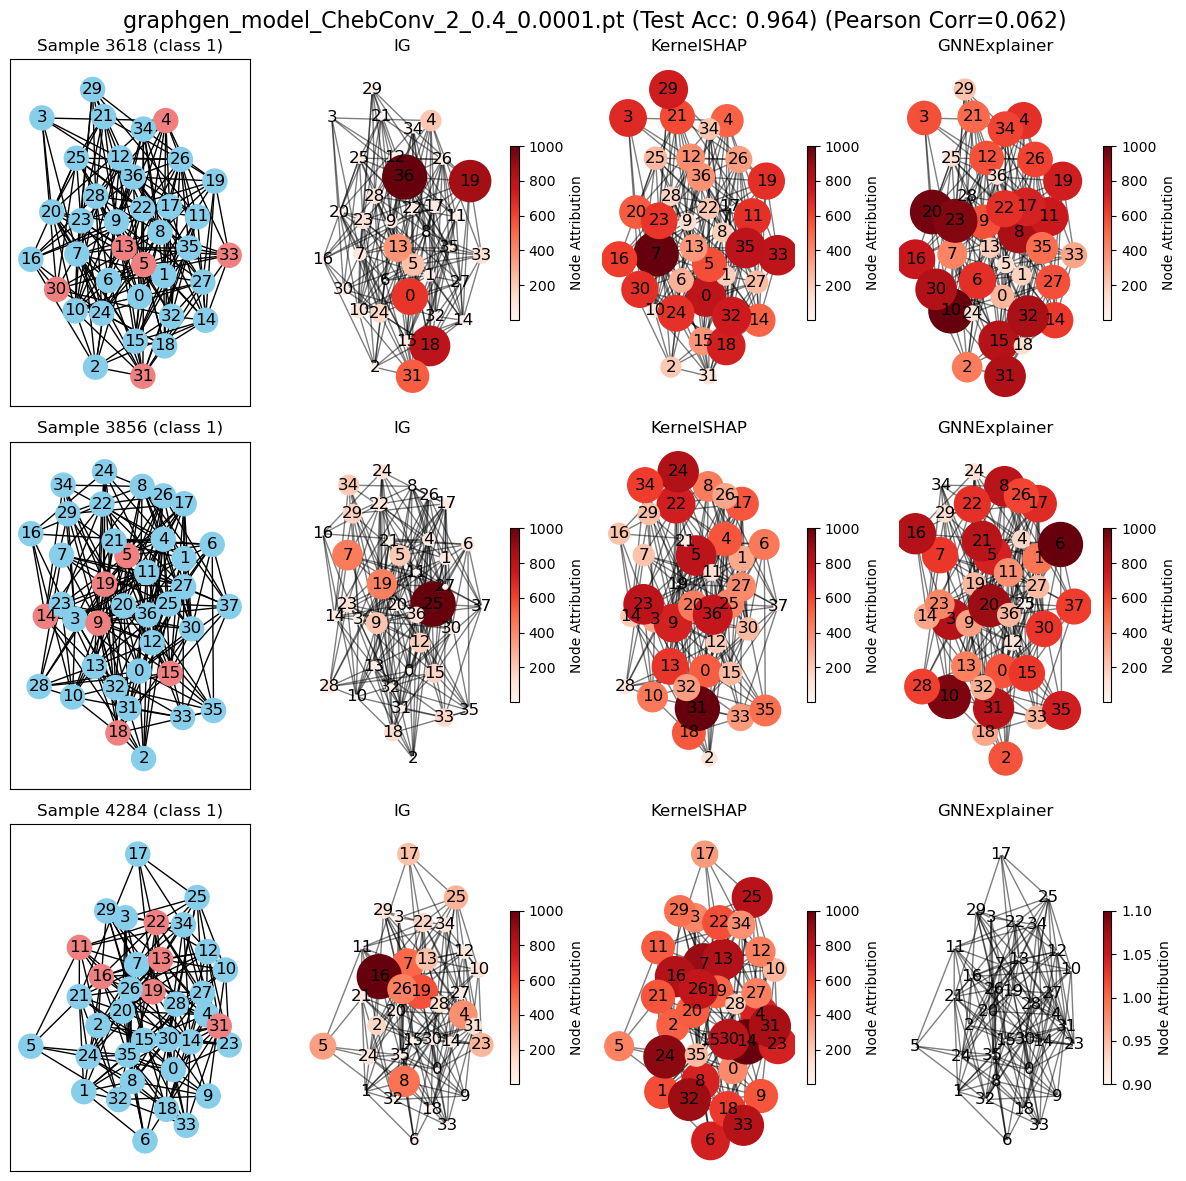

In [102]:
# print model names
for i in range(len(best_worst_models)):
    conv_types = {'GraphConv': GraphConv, 'GCNConv': GCNConv, 'ChebConv': ChebConv}
    model = GraphConvResidualNet(dim=32,
                                num_features=num_features,
                                num_classes=num_classes,
                                num_layers=most_least_corr_models.iloc[i]['num_layers'],
                                conv_type=conv_types[most_least_corr_models.iloc[i]['conv_type']],
                                dropout=most_least_corr_models.iloc[i]['dropout']).to(device)
    model_name = f"graphgen_model_{most_least_corr_models.iloc[i]['conv_type']}_{most_least_corr_models.iloc[i]['num_layers']}_{most_least_corr_models.iloc[i]['dropout']}_{most_least_corr_models.iloc[i]['l2']}.pt"
    model_path = f'syndata_exp_2023-11-15_19-51-04/{model_name}'
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()


    fig, ax = plt.subplots(3, 4, figsize=(12, 12))
    plt.suptitle(f'{model_name} (Test Acc: {most_least_corr_models.iloc[i]["test_acc"]:.3f}) (Pearson Corr={most_least_corr_models.iloc[i]["pearson_corr_avg"]:.3f})', fontsize=16)

    count = 0
    while count < 3:
        # pick random sample from test set
        sample_i = np.random.randint(len(train_dataset))
        input_data = train_dataset[sample_i]

        class_label = 1
        if input_data.y.item() != class_label:
            continue

        input_data = input_data.to(device) 
        mask = torch.stack([torch.ones_like(input_data.x).requires_grad_(True).to(device)]*1)

        # calculate attributions
        ig_node_attr, shap_node_attr, gnnexplainer_node_attr = calculate_attributions(model, input_data, mask, class_label)
        
        # Visualize attributions for the example data
        visualize_graph(input_data, ax[count][0], f'Sample {sample_i} (class {input_data.y.item()})')
        visualize_attributions(input_data, ig_node_attr, ax[count][1], 'IG')
        visualize_attributions(input_data, shap_node_attr, ax[count][2], 'KernelSHAP')
        visualize_attributions(input_data, gnnexplainer_node_attr, ax[count][3], 'GNNExplainer')
        
        count += 1

    plt.tight_layout()
    plt.show()


In [ ]:
"""
gt with 1 on motifs e.g [1, 0, 1, 0]
sigmoid(abs(attr)) e.g. [0.8, 0.2, 0.4, 0.1]

weighted cross-entropy on these two

# add following columns to csv
ig_cross_entropy_class0, ig_cross_entropy_class1, 
shap_cross_entropy_class0, shap_cross_entropy_class1, 
gnnexplainer_cross_entropy_class0, gnnexplainer_cross_entropy_class1
"""

In [156]:
# calculate cross entropy loss for each method
# generate ground truth by assigning 1 to nodes in motifs and 0 to all other nodes
print(input_data.motifs)
ground_truth = torch.zeros_like(input_data.x, dtype=torch.float64)
for motif in input_data.motifs:
    ground_truth[motif] = 1
ground_truth = ground_truth.to(device)
ground_truth = torch.max(torch.abs(ground_truth), axis=1).values
print(ground_truth)

wt = torch.unique(ground_truth, return_counts=True)[1]
print('wt counts', wt)
wt  = wt / torch.sum(wt)
wt = 1-wt
print('wt', wt)
wtts = torch.ones_like(ground_truth)
wtts[ground_truth == 1] = wt[1]
wtts[ground_truth == 0] = wt[0]
print('wt', wtts)

# softmax of attributions
print('shapes: ', ig_node_attr.shape, ground_truth.shape)
print(ig_node_attr)
ig_scores = torch.sigmoid(torch.tensor(ig_node_attr))
print('sigmoid: ', ig_scores)

# calculate cross entropy loss for each method
ig_cross_entropy = F.binary_cross_entropy(ig_scores, ground_truth, weight=wtts)
print(f'IG Cross Entropy Loss: {ig_cross_entropy:.3f}')

[[22, 11, 31, 16, 13, 19]]
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       dtype=torch.float64)
wt counts tensor([30,  6])
wt tensor([0.1667, 0.8333])
wt tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667,
        0.1667, 0.1667, 0.8333, 0.1667, 0.8333, 0.1667, 0.1667, 0.8333, 0.1667,
        0.1667, 0.8333, 0.1667, 0.1667, 0.8333, 0.1667, 0.1667, 0.1667, 0.1667,
        0.1667, 0.1667, 0.1667, 0.1667, 0.8333, 0.1667, 0.1667, 0.1667, 0.1667],
       dtype=torch.float64)
shapes:  (36,) torch.Size([36])
[0.02860292 0.01784339 0.35209076 0.10385372 0.81741348 0.72289284
 0.11001179 1.06276012 0.99822674 0.04252765 0.25275824 0.02425033
 0.20538998 0.49984506 0.12074411 0.05615814 2.09837679 0.50176409
 0.07534257 1.20271643 0.11016393 0.14588618 0.35704233 0.57361596
 0.23559144 0.58736926 0.90790965 0.15926721 0.29073597 0.2386905
 0.12208827

In [159]:
from torcheval.metrics import BinaryAUROC
metric = BinaryAUROC()
metric.update(ig_scores, ground_truth)
metric.compute()

/Users/kumarh/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/kumarh/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <E03EDA44-89AE-3115-9796-62BA9E0E2EDE> /Users/kumarh/anaconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <F2FE5CF8-5B5B-3FAD-ADF8-C77D90F49FC9> /Users/kumarh/anaconda3/lib/python3.11/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


tensor(0.6944, dtype=torch.float64)

In [171]:
from sklearn.metrics import roc_auc_score, classification_report, f1_score
roc_auc_score(ground_truth.detach().cpu().numpy(), ig_scores.detach().cpu().numpy())

0.6944444444444444